<span style="font-family:Trebuchet MS; font-size:2em;">Project 3 | NB3: EDA</span>

Riley Robertson | Reddit Classification Project | 

# Imports and setup

In [5]:
# basics
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# custom
import utilities.densmore as dns

**Data Import**

In [2]:
df = pd.read_csv('../data/reddit_posts_clean.csv')

---

To Dos

In [ ]:
# Overlaid filled line plot of post length from each sub

In [ ]:
# Look at failed full text of failed predictions. why might they have been misclassified?

In [ ]:
# Confusion Matrix

In [ ]:
# 

# EDA

## Investigating Post Lengths and Word Counts

In [ ]:
df['post_length'] = df['selftext'].map(lambda x: len(x))
df['post_word_count'] = df['selftext'].map(lambda x: len(x.split(' ')))

In [ ]:
pd.reset_option('display.max_colwidth')

In [9]:
df.head(1)

,Unnamed: 0,subreddit,score,comments,index,tag,post_length,post_word_count,title,post,alltext
0,0,PremierLeague,1,164,1,Discussion,237,38,One day I hope Mourinho will go somewhere wher...,Everyone raves about defence being his strateg...,One day I hope Mourinho will go somewhere wher...


### Character Count

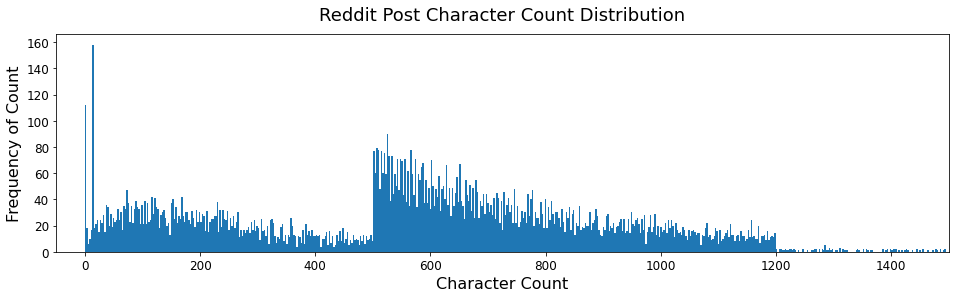

In [6]:
plt.figure(figsize = (16,4))

plt.hist(df['post_length'],bins=13000)

plt.xlim(left=-50)
plt.xlim(right=1500)

plt.title('Reddit Post Character Count Distribution', size = '18', pad = '14')

plt.xlabel('Character Count', size = 16)
plt.xticks(size = 12)

plt.ylabel('Frequency of Count', size = 16)
plt.yticks(size = 12);

### Word Count

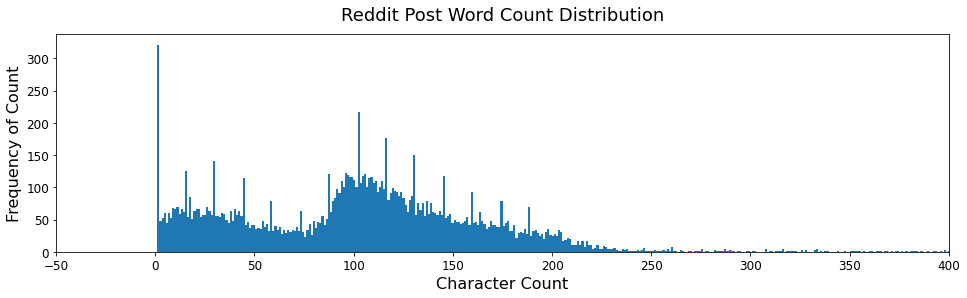

In [7]:
plt.figure(figsize = (16,4))

plt.hist(df['post_word_count'],bins=5000)

plt.xlim(left=-50)
plt.xlim(right=400)

plt.title('Reddit Post Word Count Distribution', size = '18', pad = '14')

plt.xlabel('Character Count', size = 16)
plt.xticks(size = 12)

plt.ylabel('Frequency of Count', size = 16)
plt.yticks(size = 12);

## Investigating Distribution of Post Creation Dates

In [8]:
df.head(1)

,Unnamed: 0,subreddit,score,comments,index,tag,post_length,post_word_count,title,post,alltext
0,0,PremierLeague,1,164,1,Discussion,237,38,One day I hope Mourinho will go somewhere wher...,Everyone raves about defence being his strateg...,One day I hope Mourinho will go somewhere wher...


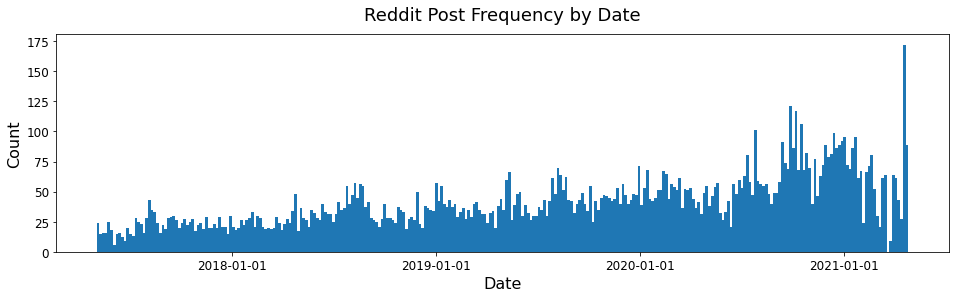

In [78]:
plt.figure(figsize = (16,4))

plt.hist(df['datetime'],bins=300)

plt.title('Reddit Post Frequency by Date', size = '18', pad = '14')

plt.xlabel('Date', size = 16)
plt.xticks(ticks=['2018-01-01', '2019-01-01', '2020-01-01', '2021-01-01'], size = 12)

plt.ylabel('Count', size = 16)
plt.yticks(size = 12);

Combined, the NFL and EPL posts span a number of years - as far back as mid 2017. There's a gentle increase in post count over time, but for the most part, the changes aren't dramatic. Our spread of posts seems good, offering a wide sample of data.

In [79]:
df['subreddit'].value_counts()

nfl              6980
PremierLeague    5545
Name: subreddit, dtype: int64

#### NFL

In [80]:
df_nfl_dates = df[df['subreddit'] == nfl]

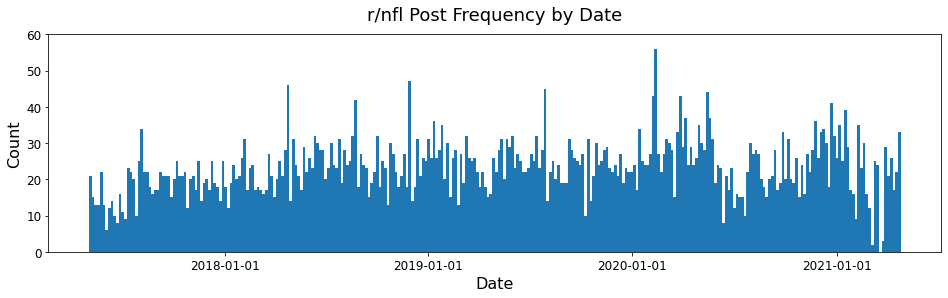

In [81]:
plt.figure(figsize = (16,4))

plt.hist(df_nfl_dates['datetime'],bins=300)

plt.ylim(top=60)

plt.title('r/nfl Post Frequency by Date', size = '18', pad = '14')

plt.xlabel('Date', size = 16)
plt.xticks(ticks=['2018-01-01', '2019-01-01', '2020-01-01', '2021-01-01'], size = 12)

plt.ylabel('Count', size = 16)
plt.yticks(size = 12);

By itself, the NFL posts are very even across the timeline.  
The changes we saw in the graph above are likely from the EPL posts, which we can investigate next.

#### EPL

In [82]:
df_epl_dates = df[df['subreddit'] == epl]

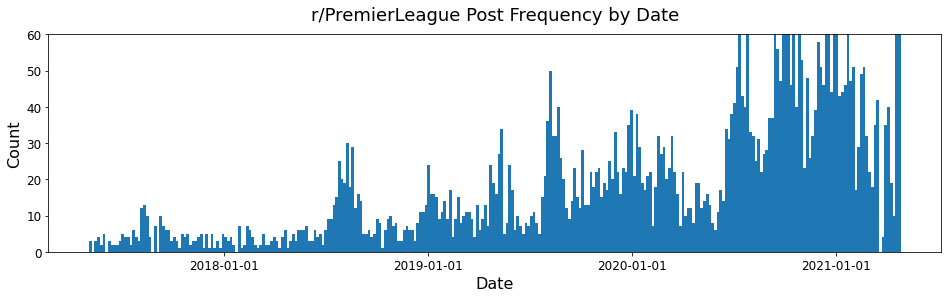

In [83]:
plt.figure(figsize = (16,4))

plt.hist(df_epl_dates['datetime'],bins=300)

plt.ylim(top=60) 

plt.title('r/PremierLeague Post Frequency by Date', size = '18', pad = '14')

plt.xlabel('Date', size = 16)
plt.xticks(ticks=['2018-01-01', '2019-01-01', '2020-01-01', '2021-01-01'], size = 12)

plt.ylabel('Count', size = 16)
plt.yticks(size = 12);

As suspected, there is a far less consistency in post volume over time, quite possibly due to the kinds of posts I removed during the cleaning process. I limited the y axis on both charts to 60 for the sake of comparison. The least-represented data is EPL posts from 2017 through most of 2019. I don't think the lack of consistency will cause a problem in our analysis, but I can always come back and adjust my cleaning process to retain a larger number of posts from the PremierLeague subreddit.